**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime
import joblib
import json

**Data Loading**


In [2]:

# loading the data from the csv file to a panadas DataFrame 
customer_data = pd.read_csv('StyleSense_Dataset_updated.csv')

In [4]:
#first five rows in the DataFrame
customer_data.head()


,Customer_ID,Customer_Name,Email,Product,Quantity,Price_Per_Item,Total_Price,Purchase_Date,Season
0,1,Michelle Harris,zbarrett@jordan-thomas.com,Sneakers,5,3148,15740,2024-04-23,Spring
1,2,Leah Lee,rroberson@morales.org,Loafers,3,2049,6147,2024-11-04,Autumn
2,3,Sheri Espinoza,maria11@yahoo.com,Sandals,2,2649,5298,2024-06-17,Summer
3,4,Crystal Smith,fosterbrandon@perry.net,Blazer,1,4223,4223,2023-11-03,Autumn
4,5,Alexander Gomez,owade@gmail.com,Light Jacket,2,2040,4080,2024-05-02,Spring


In [5]:
season_mapping = {
    'Summer': 0,
    'Winter': 1,
    'Spring': 2,
    'Autumn': 3,
    'Monsoon': 4
}

# Apply the mapping
customer_data['Season_Number'] = customer_data['Season'].map(season_mapping)

# View the updated dataset
print(customer_data[['Season', 'Season_Number']].head())

customer_data['Purchase_Date'] = pd.to_datetime(customer_data['Purchase_Date'])

# Assuming today’s date as reference (you can set any date)
today = datetime.now()

# Calculate Recency (in days)
customer_data['Recency'] = (today - customer_data['Purchase_Date']).dt.days

# for avg_order_value
customer_data['Avg_Order_Value'] = customer_data['Total_Price'] / customer_data['Quantity']



   Season  Season_Number
0  Spring              2
1  Autumn              3
2  Summer              0
3  Autumn              3
4  Spring              2


In [6]:
customer_data.shape

(2770, 12)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer_ID      2770 non-null   int64         
 1   Customer_Name    2770 non-null   object        
 2   Email            2770 non-null   object        
 3   Product          2770 non-null   object        
 4   Quantity         2770 non-null   int64         
 5   Price_Per_Item   2770 non-null   int64         
 6   Total_Price      2770 non-null   int64         
 7   Purchase_Date    2770 non-null   datetime64[ns]
 8   Season           2770 non-null   object        
 9   Season_Number    2770 non-null   int64         
 10  Recency          2770 non-null   int64         
 11  Avg_Order_Value  2770 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 259.8+ KB


In [8]:
customer_data.isnull().sum()

Customer_ID        0
Customer_Name      0
Email              0
Product            0
Quantity           0
Price_Per_Item     0
Total_Price        0
Purchase_Date      0
Season             0
Season_Number      0
Recency            0
Avg_Order_Value    0
dtype: int64

**Feature scaling**

In [9]:
from sklearn.preprocessing import StandardScaler

features = ['Quantity','Price_Per_Item','Total_Price','Season_Number','Recency','Avg_Order_Value']
scalar = StandardScaler()
scaled = customer_data.copy()
data_after_scaling = scaled[features] = scalar.fit_transform(scaled[features])
scaled.head()


,Customer_ID,Customer_Name,Email,Product,Quantity,Price_Per_Item,Total_Price,Purchase_Date,Season,Season_Number,Recency,Avg_Order_Value
0,1,Michelle Harris,zbarrett@jordan-thomas.com,Sneakers,1.394016,0.281471,1.239282,2024-04-23,Spring,-0.015971,-0.255657,0.281471
1,2,Leah Lee,rroberson@morales.org,Loafers,-0.023801,-0.559840,-0.392893,2024-11-04,Autumn,0.697565,-1.077270,-0.559840
2,3,Sheri Espinoza,maria11@yahoo.com,Sandals,-0.732709,-0.100526,-0.537344,2024-06-17,Summer,-1.443043,-0.487394,-0.100526
3,4,Crystal Smith,fosterbrandon@perry.net,Blazer,-1.441618,1.104409,-0.720247,2023-11-03,Autumn,0.697565,0.469047,1.104409
4,5,Alexander Gomez,owade@gmail.com,Light Jacket,-0.732709,-0.566730,-0.744578,2024-05-02,Spring,-0.015971,-0.293578,-0.566730


**Extracting Features for Clustering**

In [11]:
X = scaled.iloc[:,[10,11]].values
print(X)

[[-0.25565742  0.28147061]
 [-1.07727001 -0.55983988]
 [-0.48739431 -0.10052569]
 ...
 [ 1.58559746 -0.3110447 ]
 [-0.6980642   0.69179129]
 [ 1.56874387 -0.6218473 ]]


In [12]:
customer_data.to_csv("processed_data.csv", index=False)


In [13]:
# finding wcss value for different number of clusters

wcss = []
for i  in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(len(wcss))    

10


Text(0, 0.5, 'WCSS')

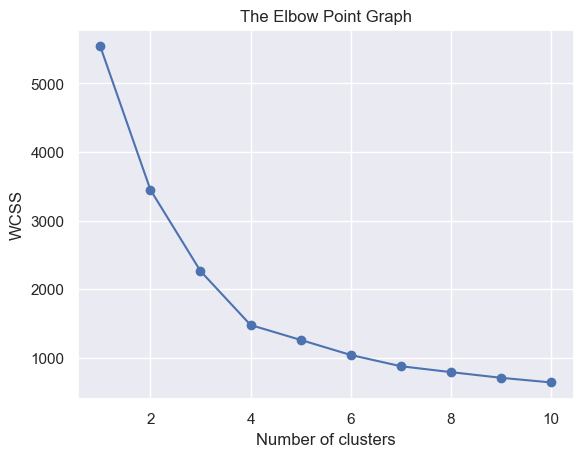

In [14]:
#plot the elbow graph 

sns.set()
plt.plot(range(1,11), wcss , marker='o', linestyle='-')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [15]:
from kneed import KneeLocator
kl = KneeLocator(list(range(1, 11)), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(4)

In [16]:
#optinum number of clusters = 4 
#training the kmeans clustering model

kmeans = KMeans(n_clusters= 4, init = 'k-means++', random_state=0)



#return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

joblib.dump(kmeans, "kmeans_model.joblib")

print("KMeans model saved successfully!")

[1 0 0 ... 2 1 2]
KMeans model saved successfully!


In [17]:
customer_data['Cluster_Label'] = kmeans.labels_
customer_data.head()


,Customer_ID,Customer_Name,Email,Product,Quantity,Price_Per_Item,Total_Price,Purchase_Date,Season,Season_Number,Recency,Avg_Order_Value,Cluster_Label
0,1,Michelle Harris,zbarrett@jordan-thomas.com,Sneakers,5,3148,15740,2024-04-23,Spring,2,348,3148.0,1
1,2,Leah Lee,rroberson@morales.org,Loafers,3,2049,6147,2024-11-04,Autumn,3,153,2049.0,0
2,3,Sheri Espinoza,maria11@yahoo.com,Sandals,2,2649,5298,2024-06-17,Summer,0,293,2649.0,0
3,4,Crystal Smith,fosterbrandon@perry.net,Blazer,1,4223,4223,2023-11-03,Autumn,3,520,4223.0,3
4,5,Alexander Gomez,owade@gmail.com,Light Jacket,2,2040,4080,2024-05-02,Spring,2,339,2040.0,0


In [18]:
# Save the updated dataset
customer_data.to_csv("processed_data.csv", index=False)



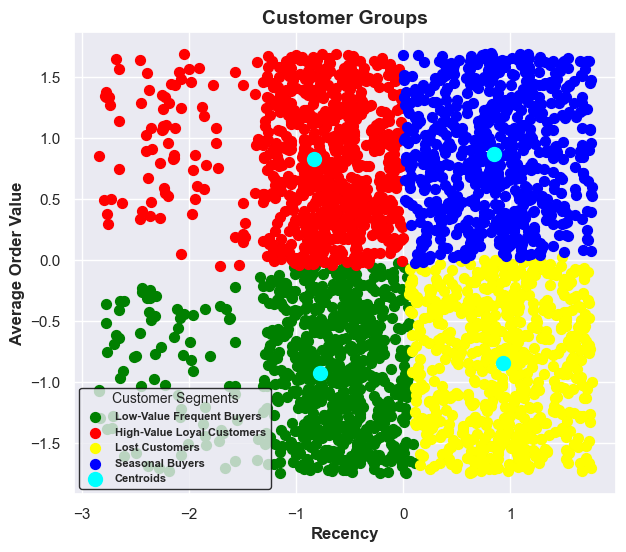

In [19]:
# Scatter plot for clusters
plt.figure(figsize=(7, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c='green', label='Low-Value Frequent Buyers')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c='red', label='High-Value Loyal Customers')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c='yellow', label='Lost Customers')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c='blue', label='Seasonal Buyers')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
        s=100, c='cyan', label='Centroids')

# Bold Title, X-Label, Y-Label
plt.title('Customer Groups', fontsize=14, fontweight='bold')
plt.xlabel('Recency', fontsize=12, fontweight='bold')
plt.ylabel('Average Order Value', fontsize=12, fontweight='bold')

# Improve legend appearance
plt.legend(fontsize=8, loc='lower left', frameon=True, framealpha=0.8, 
        edgecolor='black', title="Customer Segments", title_fontsize=10)
plt.setp(plt.gca().get_legend().get_texts(), fontweight="bold")  # Make text bold

plt.show()



# Customer Segmentation Based on Recency & Avg Order Value
# --------------------------------------------------------
# 1. High-Value Loyal Customers:   RED
#    - Recency: Low (Recent Purchasers)
#    - Avg Order Value: High
#    - Behavior: Frequent buyers with high spending
#    - Strategy: Loyalty programs, VIP benefits, exclusive deals
#
# 2. Low-Value Frequent Buyers:  GREEN
#    - Recency: Low (Recent Purchasers)
#    - Avg Order Value: Low
#    - Behavior: Frequent buyers with small purchases
#    - Strategy: Upselling, cross-selling, bundle offers
#
# 3. Seasonal Buyers:  BLUE
#    - Recency: High (Occasionally Active)
#    - Avg Order Value: Varies
#    - Behavior: Customers who purchase during specific seasons
#    - Strategy: Seasonal promotions, reminders, special discounts
#
# 4. Lost Customers:  YELLOW
#    - Recency: Very High (Long Inactive)
#    - Avg Order Value: Low
#    - Behavior: Rare shoppers with minimal spending
#    - Strategy: Win-back campaigns, re-engagement strategies

In [20]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, Y)
print(f"Silhouette Score: {sil_score:.4f}") 


Silhouette Score: 0.4066


In [21]:
import numpy as np

# Count the number of data points in each cluster
unique, counts = np.unique(Y, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Print the number of customers in each cluster
for cluster_num, count in cluster_counts.items():
    print(f'Cluster {cluster_num}: {count} customers')


Cluster 0: 702 customers
Cluster 1: 751 customers
Cluster 2: 658 customers
Cluster 3: 659 customers


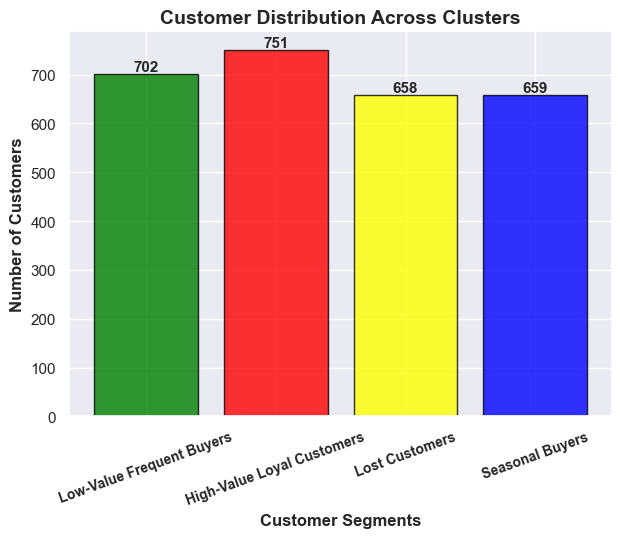

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define customer segment labels
clusters = ['Low-Value Frequent Buyers', 'High-Value Loyal Customers', 'Lost Customers', 'Seasonal Buyers']
colors=['green', 'red', 'yellow', 'blue']
# Data for bar chart
sizes = [cluster_counts[i] for i in range(len(clusters))]  # Match sizes to cluster count

# Plotting the bar chart
plt.figure(figsize=(7, 5))
bars = plt.bar(clusters, sizes, color=colors, edgecolor='black', alpha=0.8)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{bar.get_height()}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Bold Title, X-Label, Y-Label
plt.title('Customer Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segments', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

# Rotate x labels for better visibility
plt.xticks(rotation=20, fontsize=10, fontweight='bold')

# Display the plot
plt.show()


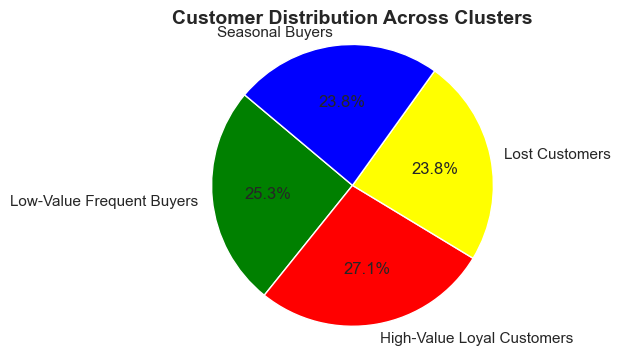

In [24]:
import matplotlib.pyplot as plt
# Define customer segment labels
clusters = [
    'Low-Value Frequent Buyers', 
    'High-Value Loyal Customers', 
    'Lost Customers', 
    'Seasonal Buyers'
]

# Data for pie chart
sizes = [cluster_counts[i] for i in range(len(clusters))]  # Match sizes to cluster count
labels = clusters  # Use correct labels

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'yellow', 'blue'])
plt.title('Customer Distribution Across Clusters',fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()                             

In [25]:
# Define mappings for customer segments
segment_mapping = {
    0: "Low-Value Frequent Buyers",
    1: "High-Value Loyal Customers",
    2: "Lost Customers",
    3: "Seasonal Buyers"
}

# Define suggested marketing campaigns for each segment
campaign_mapping = {
    0: "Discount Coupons & Loyalty Programs",
    1: "Exclusive Membership & VIP Rewards",
    2: "Re-engagement Emails & Offers",
    3: "Seasonal Promotions & Personalized Offers"
}

# Map the cluster labels to the corresponding segment and campaign
customer_data['Segment'] = customer_data['Cluster_Label'].map(segment_mapping)
customer_data['Suggested_Campaign'] = customer_data['Cluster_Label'].map(campaign_mapping)

# Display the updated dataset
customer_data.head()




,Customer_ID,Customer_Name,Email,Product,Quantity,Price_Per_Item,Total_Price,Purchase_Date,Season,Season_Number,Recency,Avg_Order_Value,Cluster_Label,Segment,Suggested_Campaign
0,1,Michelle Harris,zbarrett@jordan-thomas.com,Sneakers,5,3148,15740,2024-04-23,Spring,2,348,3148.0,1,High-Value Loyal Customers,Exclusive Membership & VIP Rewards
1,2,Leah Lee,rroberson@morales.org,Loafers,3,2049,6147,2024-11-04,Autumn,3,153,2049.0,0,Low-Value Frequent Buyers,Discount Coupons & Loyalty Programs
2,3,Sheri Espinoza,maria11@yahoo.com,Sandals,2,2649,5298,2024-06-17,Summer,0,293,2649.0,0,Low-Value Frequent Buyers,Discount Coupons & Loyalty Programs
3,4,Crystal Smith,fosterbrandon@perry.net,Blazer,1,4223,4223,2023-11-03,Autumn,3,520,4223.0,3,Seasonal Buyers,Seasonal Promotions & Personalized Offers
4,5,Alexander Gomez,owade@gmail.com,Light Jacket,2,2040,4080,2024-05-02,Spring,2,339,2040.0,0,Low-Value Frequent Buyers,Discount Coupons & Loyalty Programs


In [26]:
# Save the updated dataset
customer_data.to_csv("processed_data.csv", index=False)


In [27]:


# Load processed CSV file
df = pd.read_csv("processed_data.csv")

# Convert to Excel
df.to_excel("processed_data.xlsx", index=False, engine="openpyxl")

print("✅ Excel file saved successfully as processed_data.xlsx!")


✅ Excel file saved successfully as processed_data.xlsx!


In [28]:


# Load processed data with cluster labels
customer_data = pd.read_csv("processed_data.csv")

# Define cluster labels
clusters = ['Low-Value Frequent Buyers', 'High-Value Loyal Customers', 'Lost Customers', 'Seasonal Buyers']

# Count the number of customers in each cluster
cluster_counts = customer_data['Cluster_Label'].value_counts().to_dict()

# Create JSON structure
chart_data = {
    "clusters": [
        {
            "name": clusters[i],
            "count": cluster_counts.get(i, 0)  # Ensure all clusters are included
        } 
        for i in range(len(clusters))
    ]
}

# Save JSON file
with open("cluster_data.json", "w") as json_file:
    json.dump(chart_data, json_file, indent=4)

print("JSON file created successfully!")


JSON file created successfully!
